<a href="https://colab.research.google.com/github/jjj5306/ComputerVisionClass/blob/main/%5BCV%5DAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 4-1
## Object Detection 실습 구현 - YOLO 시리즈

### 1. YOLO v5 저장소 클론 및 requirements 설치

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17488 (delta 0), reused 1 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17488/17488), 16.55 MiB | 12.94 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00

### 2. COCO128 데이터셋 다운로드

In [2]:
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip

print("\n이미지 개수 확인:")
!ls coco128/images/train2017/ | wc -l

print("\n라벨 개수 확인:")
!ls coco128/labels/train2017/ | wc -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  13.1M      0 --:--:-- --:--:-- --:--:-- 13.1M

이미지 개수 확인:
128

라벨 개수 확인:
128


### 3. YOLO v5 학습

In [5]:
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project ./runs/train --name my_yolo_exp --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-07 07:59:30.141982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749283170.410839    2637 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749283170.482730    2637 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

### 4. 학습 결과 확인 및 시각화


1. mAP@0.5 및 성능 지표 분석
mAP@0.5: 0.9268
Precision: 0.8983
Recall: 0.8644

2. Precision-Recall Curve 시각화


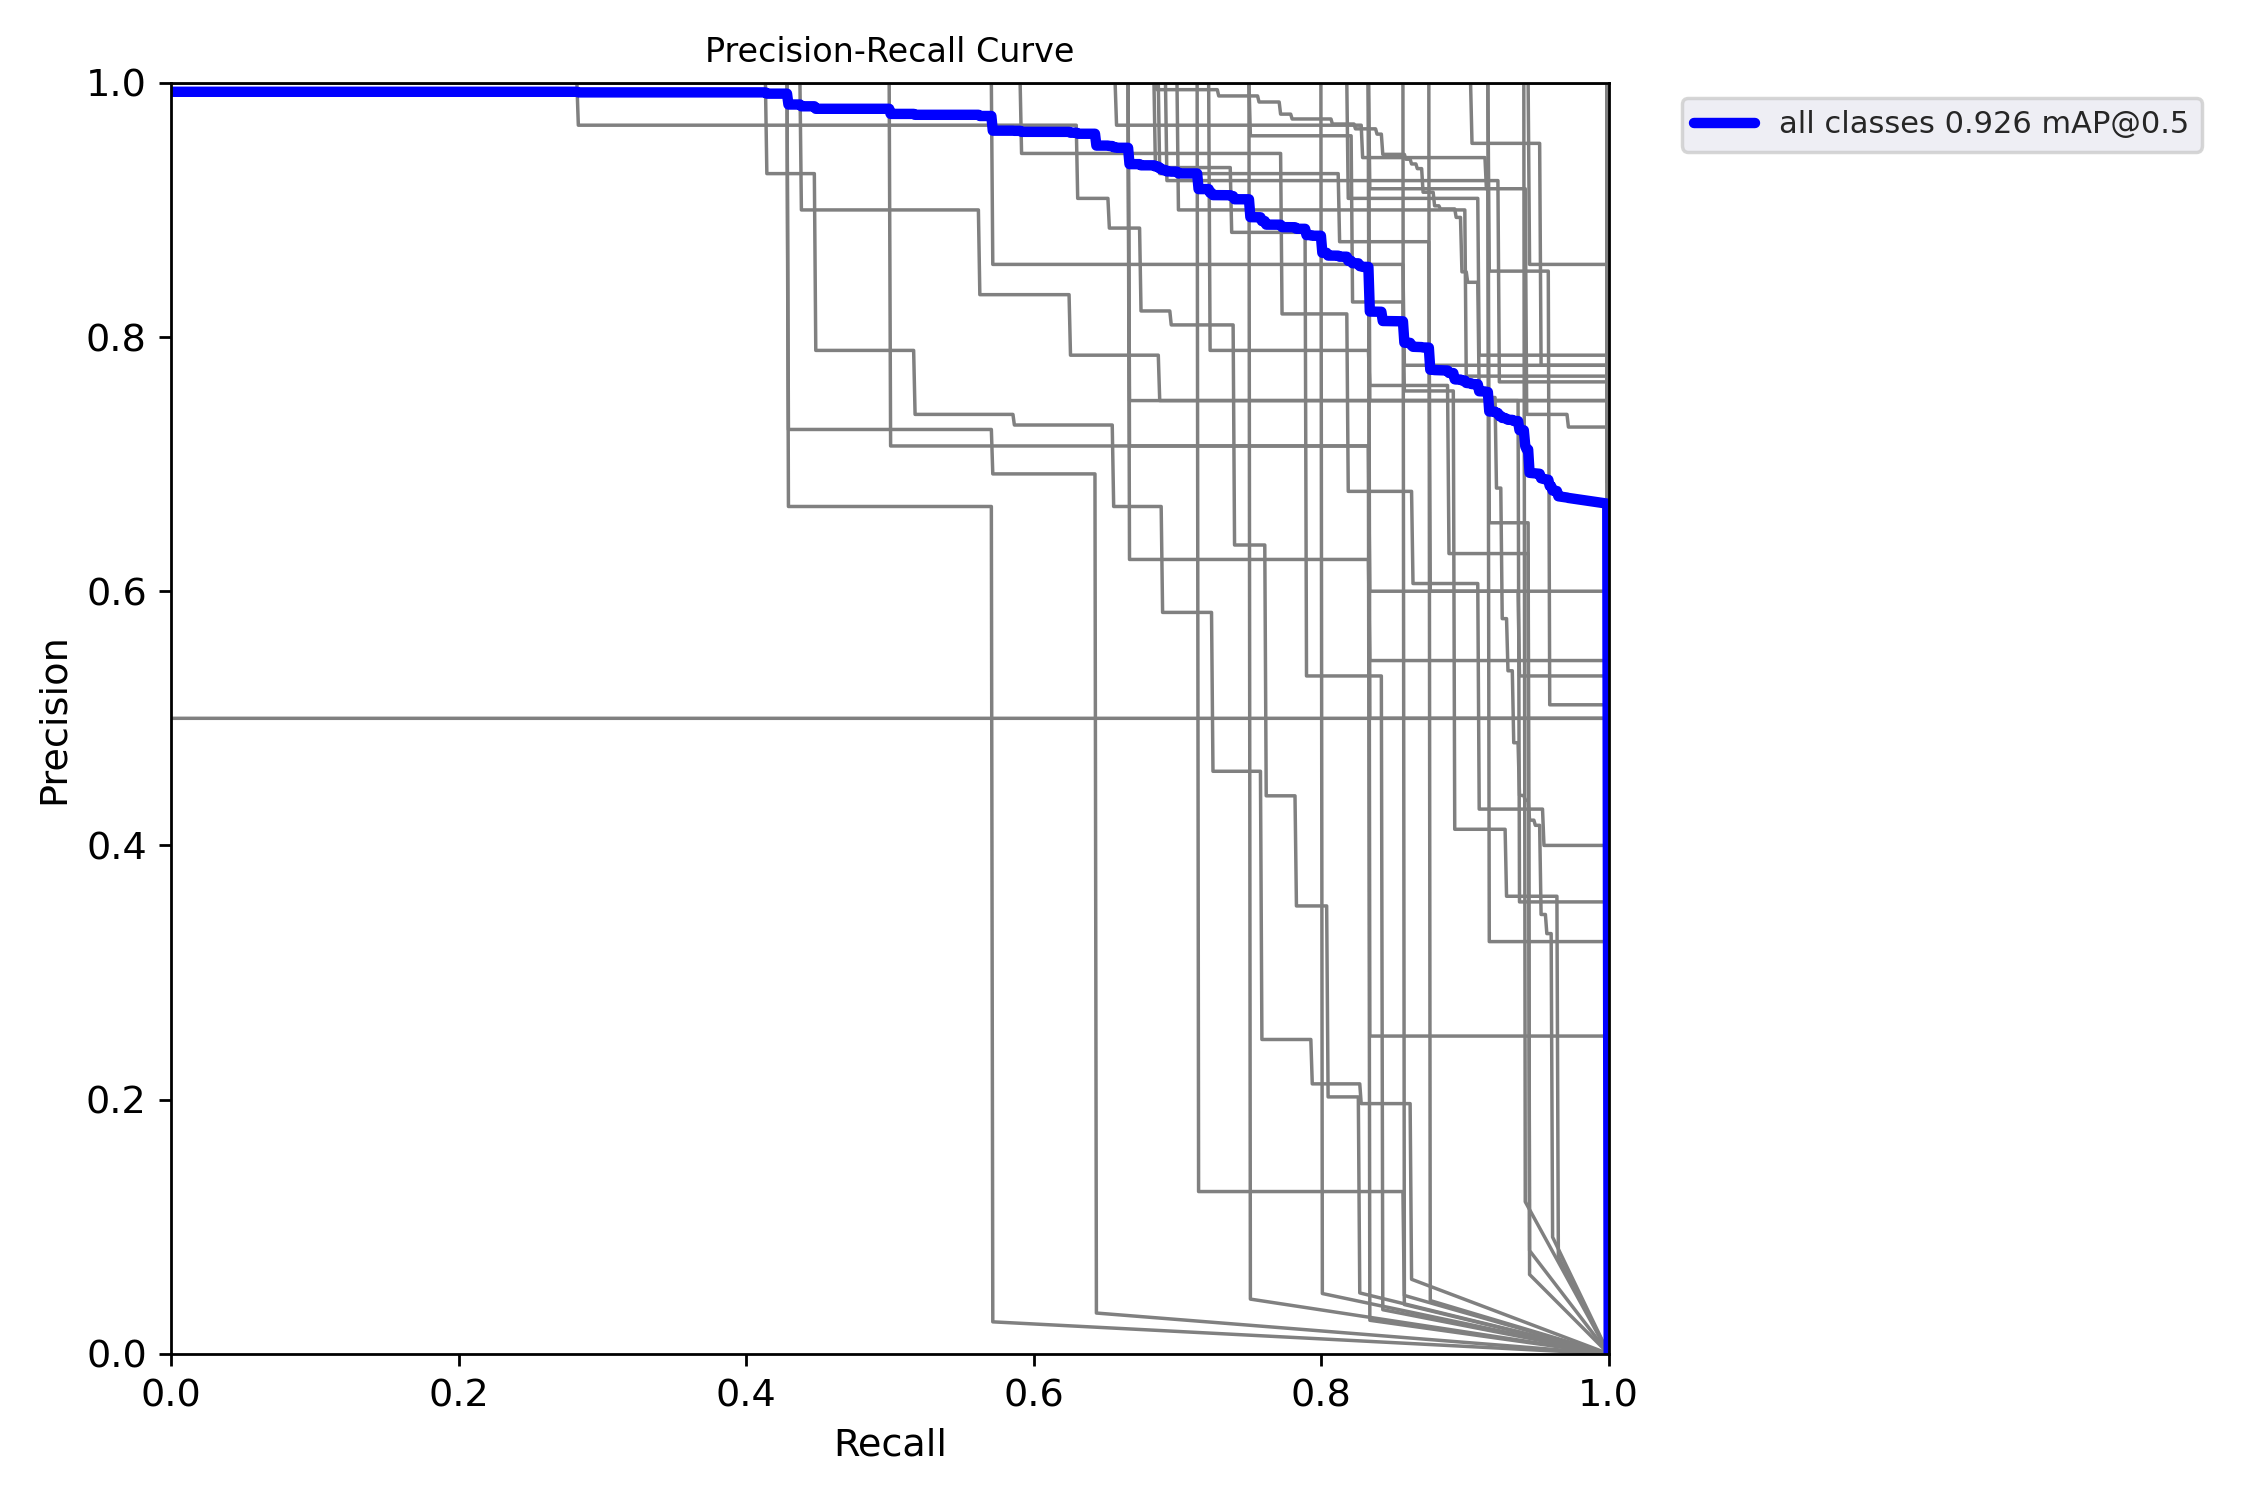


3. F1 Curve 시각화


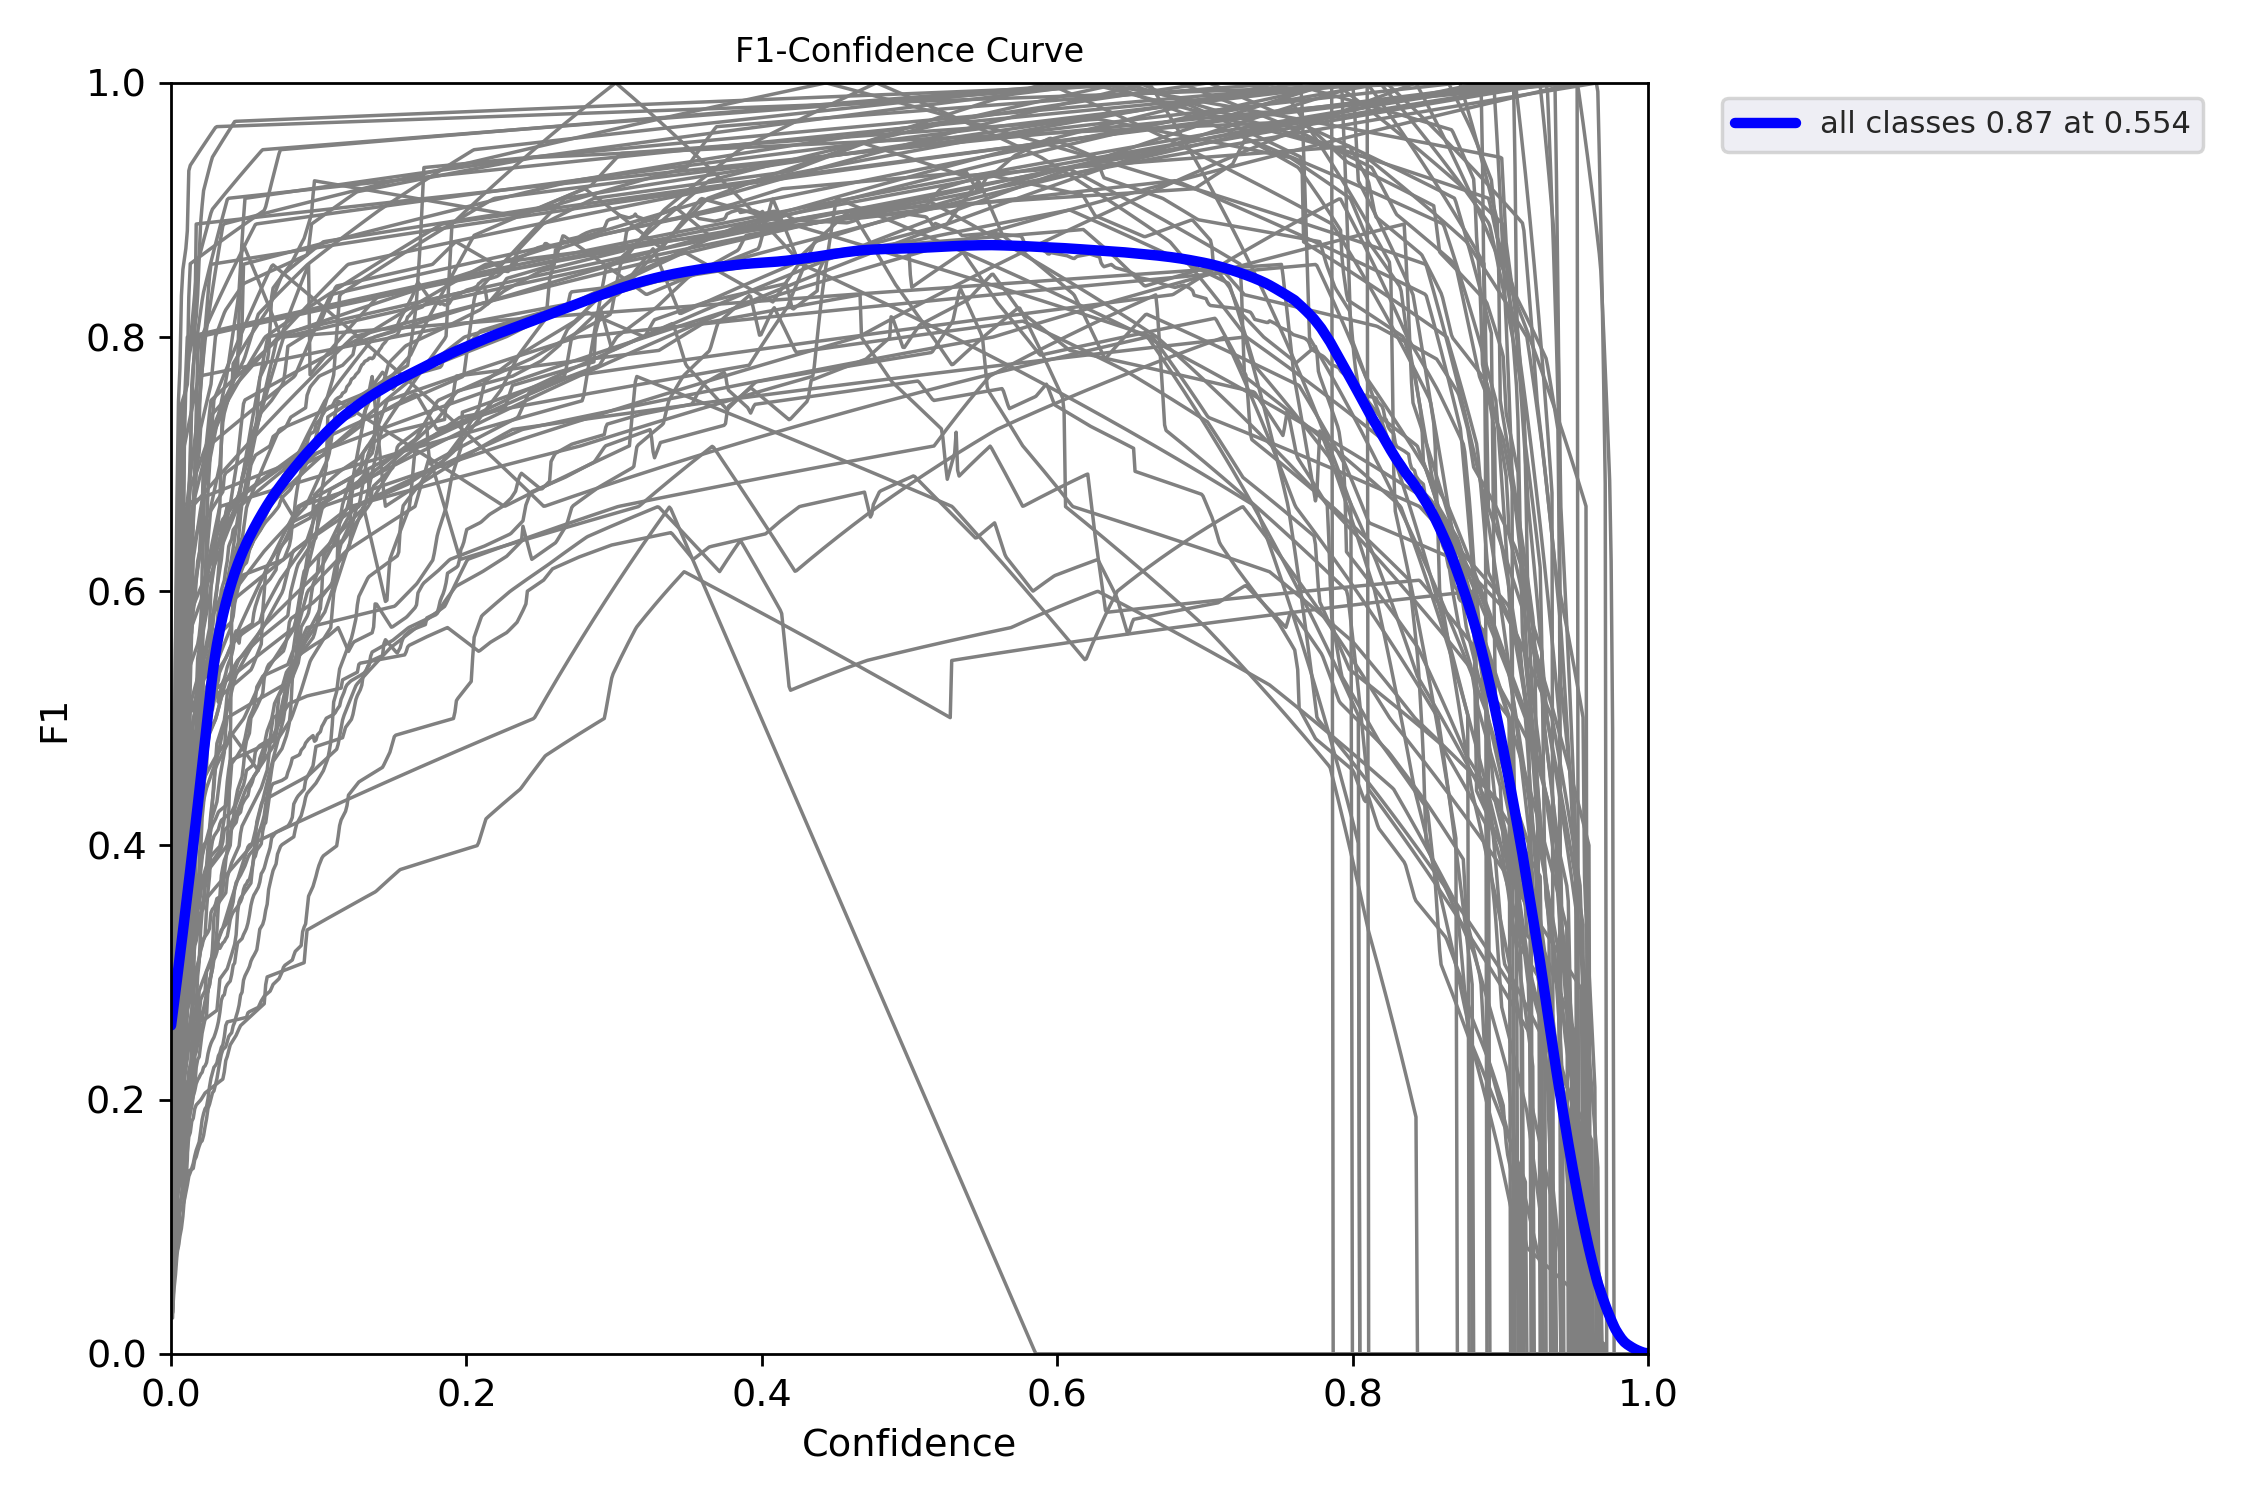


4. Inference 속도 측정
평균 추론 시간 (이미지당): 7.336초
FPS (Frames Per Second): 0.1
총 10장 처리 시간: 66.02초


In [7]:
import os
import time
import torch
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np

# 1. mAP@0.5 및 기본 성능 지표 추출
print("\n1. mAP@0.5 및 성능 지표 분석")

# 학습 결과 CSV 파일 읽기
results_path = 'runs/train/my_yolo_exp/results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)

    # 열 이름 정리 (공백 제거)
    results_df.columns = results_df.columns.str.strip()
    final_metrics = results_df.iloc[-1]  # 마지막 에포크

    print(f"mAP@0.5: {final_metrics['metrics/mAP_0.5']:.4f}")
    print(f"Precision: {final_metrics['metrics/precision']:.4f}")
    print(f"Recall: {final_metrics['metrics/recall']:.4f}")

else:
    print("Error: results.csv 파일을 찾을 수 없습니다.")

# 2. Precision-Recall Curve 시각화
print("\n2. Precision-Recall Curve 시각화")

pr_curve_path = 'runs/train/my_yolo_exp/PR_curve.png'
if os.path.exists(pr_curve_path):
    display(Image(pr_curve_path))
else:
    print("Error: PR_curve.png 파일을 찾을 수 없습니다.")

# 3. F1 Curve 시각화
print("\n3. F1 Curve 시각화")

f1_curve_path = 'runs/train/my_yolo_exp/F1_curve.png'
if os.path.exists(f1_curve_path):
    display(Image(f1_curve_path))

# 4. Inference 속도 측정
print("\n4. Inference 속도 측정")

# 테스트 이미지들 준비
test_images = []
import glob
coco_images = glob.glob('coco128/images/train2017/*.jpg')
test_images = coco_images[:10]  # 10장으로 테스트

if test_images:
    # 속도 측정을 위한 추론 실행
    start_time = time.time()

    for i, img_path in enumerate(test_images):
        !python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source {img_path} --project ./runs/detect --name speed_test --exist-ok --save-txt --nosave > /dev/null 2>&1
        if i == 0:
            first_inference_time = time.time() - start_time
            start_time = time.time()  # 다시 시작

    total_time = time.time() - start_time
    avg_time_per_image = total_time / (len(test_images) - 1)  # 첫 번째 제외 (모델 로딩 때문에 일관성이 흐트러짐)
    fps = 1 / avg_time_per_image

    print(f"평균 추론 시간 (이미지당): {avg_time_per_image:.3f}초")
    print(f"FPS (Frames Per Second): {fps:.1f}")
    print(f"총 {len(test_images)}장 처리 시간: {total_time:.2f}초")

else:
    print("Error")

### 5. 추론


비교 이미지 1: 000000000395.jpg
detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=coco128/images/train2017/000000000395.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./runs/detect, name=final_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/coco128/images/train2017/000000000395.jpg: 608x640 11 persons, 2 cell phones, 27.4ms
Speed: 0.5ms pre-process, 27.4ms inference, 122.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/final_results
3

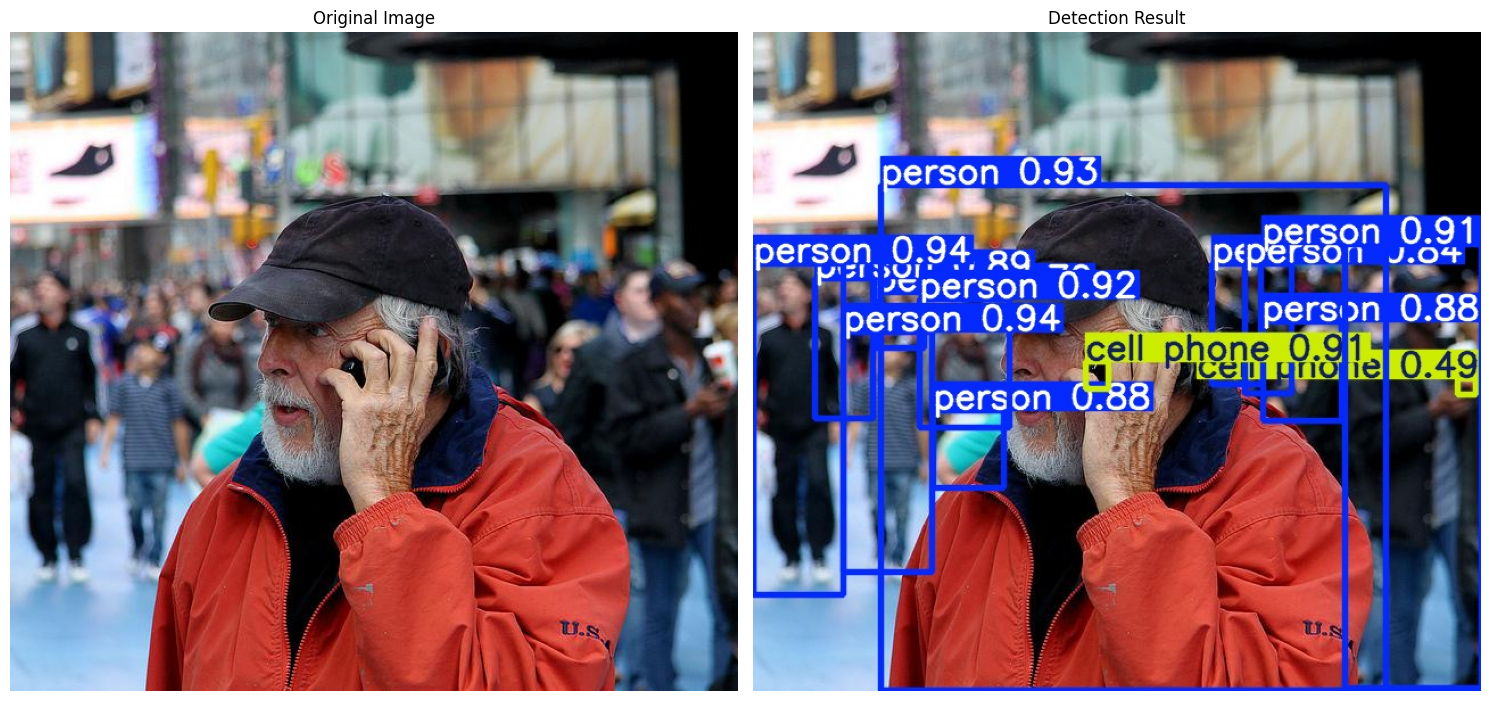


비교 이미지 2: 000000000312.jpg
detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=coco128/images/train2017/000000000312.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./runs/detect, name=final_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/coco128/images/train2017/000000000312.jpg: 448x640 5 elephants, 28.3ms
Speed: 0.5ms pre-process, 28.3ms inference, 114.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/final_results
3 labels saved 

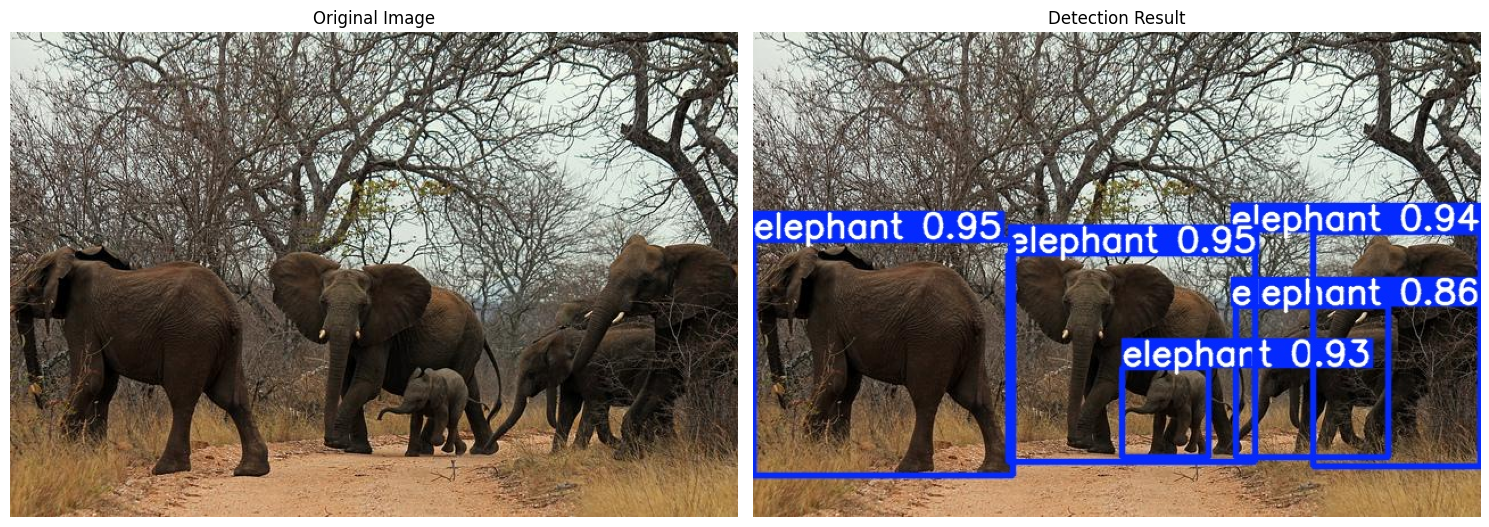


비교 이미지 3: 000000000208.jpg
detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=coco128/images/train2017/000000000208.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./runs/detect, name=final_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/coco128/images/train2017/000000000208.jpg: 480x640 2 sinks, 2 toothbrushs, 27.7ms
Speed: 0.5ms pre-process, 27.7ms inference, 133.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/final_results
3 la

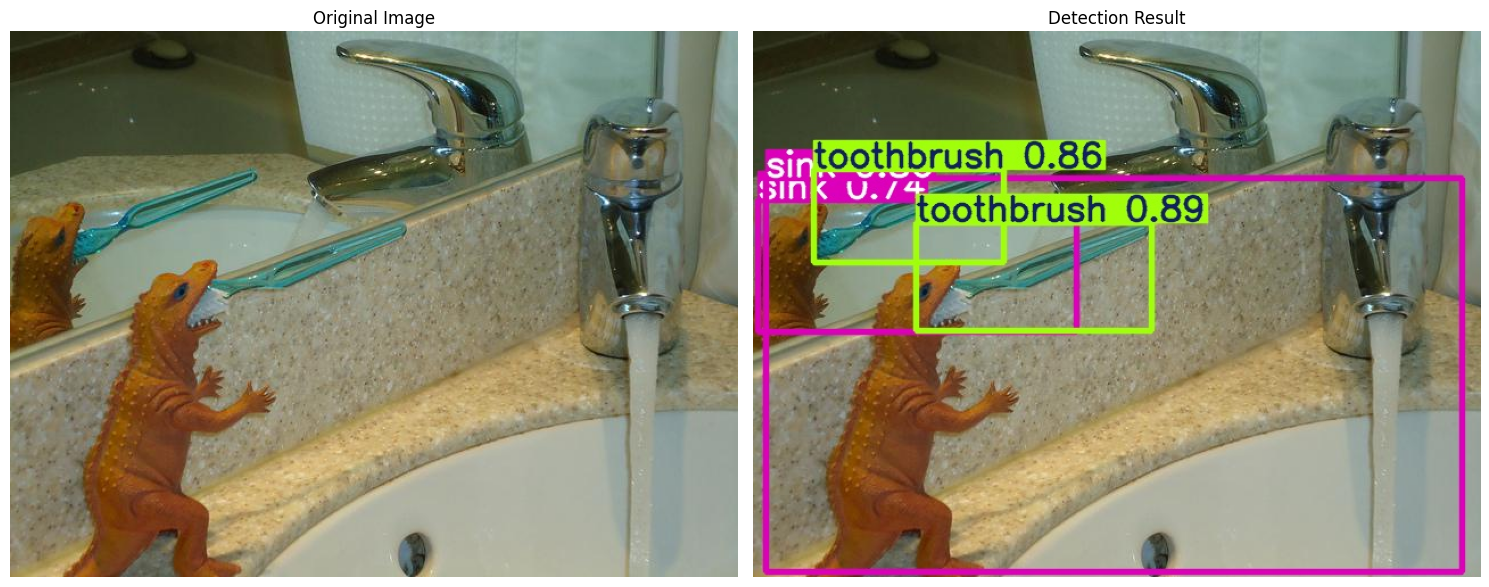

In [9]:
import cv2
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# 추론용 이미지 3장 선택
detection_samples = test_images[:3] if test_images else []

for i, img_path in enumerate(detection_samples):
   img_name = os.path.basename(img_path)

   print(f"\n비교 이미지 {i+1}: {img_name}")

   # Detection 실행
   !python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source {img_path} --project ./runs/detect --name final_results --exist-ok --save-txt --save-conf

   # 결과 이미지 경로
   result_path = f'runs/detect/final_results/{img_name}'

   if os.path.exists(result_path):
       # 원본과 결과 이미지를 나란히 비교
       fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

       # 원본 이미지
       original_img = PILImage.open(img_path)
       ax1.imshow(original_img)
       ax1.set_title(f'Original Image', fontsize=12)
       ax1.axis('off')

       # 결과 이미지
       result_img = PILImage.open(result_path)
       ax2.imshow(result_img)
       ax2.set_title(f'Detection Result', fontsize=12)
       ax2.axis('off')

       plt.tight_layout()
       plt.show()
       plt.close()
